In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import tqdm
import time
from datetime import datetime
import copy
import random

In [11]:

rs = "2021-10-21-09-17_rs_e50000"
rmhc = "2021-10-23-17-11_rmhc_e50000"
rrhc = "2021-10-23-16-56_rshc_e50000"

# ga = "202110051047_ga_no_m_plot.csv"
ea_div = "2021-10-23-14-26_ea_div_e500"
# ea_div_m = "2021-10-23-19-26_ea_div_mut_e50000"
ea_div_m = "2021-10-23_ea_div_m/2021-10-23_ea_div_mut_learningcurve"

rs_data = pd.read_csv(f'{rs}_plot.csv')
rmhc_data = pd.read_csv(f'{rmhc}_plot.csv')
rrhc_data = pd.read_csv(f'{rrhc}_plot.csv')


ea_div_data = pd.read_csv(f"{ea_div}_plot.csv")
# ea_div_m_data = pd.read_csv(f"{ea_div_m}_plot.csv")
ea_div_m_data = pd.read_csv(f"{ea_div_m}.txt", sep=', ',names=['mse', 'evaluation'],engine='python')
ea_div_m_data

,mse,evaluation
0,13.709984,0
1,13.139034,2
2,12.513453,4
3,12.210483,5
4,11.492714,10
5,10.277929,11
6,10.161562,13
7,9.399752,14
8,9.073781,29
9,9.063227,74


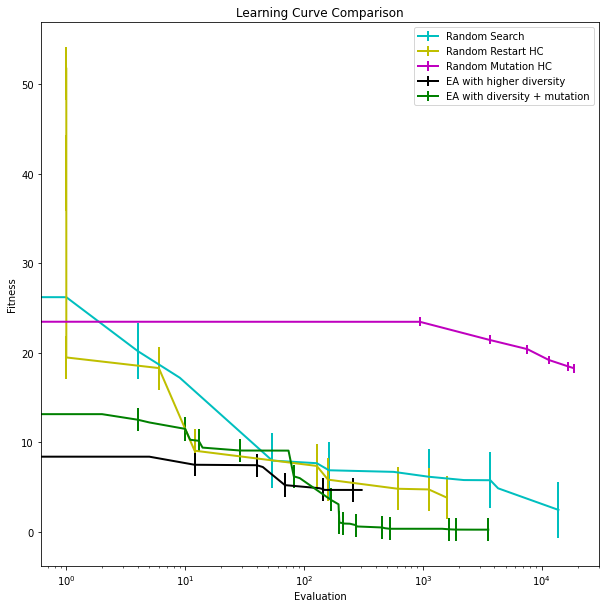

In [12]:
plt.figure(figsize=(10,10))

# plt.xscale('log')

# average after 3 runs
avg_rs = 3.11
avg_rmhc = 0.5
avg_rrhc =2.41

avg_ea_div = 1.3

plt.errorbar(rs_data['evaluation'], rs_data["mse"],label='Random Search', color='c',linewidth=2, yerr=avg_rs, errorevery=2)
plt.errorbar(rrhc_data['evaluation'], rrhc_data['mse'], label='Random Restart HC', color='y',linewidth=2,yerr=avg_rrhc, errorevery=1) ###
plt.errorbar(rmhc_data['evaluation'], rmhc_data['mse'], label='Random Mutation HC', color='m',linewidth=2,yerr=avg_rmhc, errorevery=1) ###
plt.errorbar(ea_div_data['evaluation'], ea_div_data['mse'], label='EA with higher diversity', color='k',linewidth=2,yerr=avg_ea_div, errorevery=2)
plt.errorbar(ea_div_m_data['evaluation'], ea_div_m_data['mse'], label='EA with diversity + mutation', color='g',linewidth=2,yerr=avg_ea_div, errorevery=2)

plt.xscale('log')
plt.legend()
plt.xlabel("Evaluation")
plt.ylabel("Fitness")
plt.title("Learning Curve Comparison");

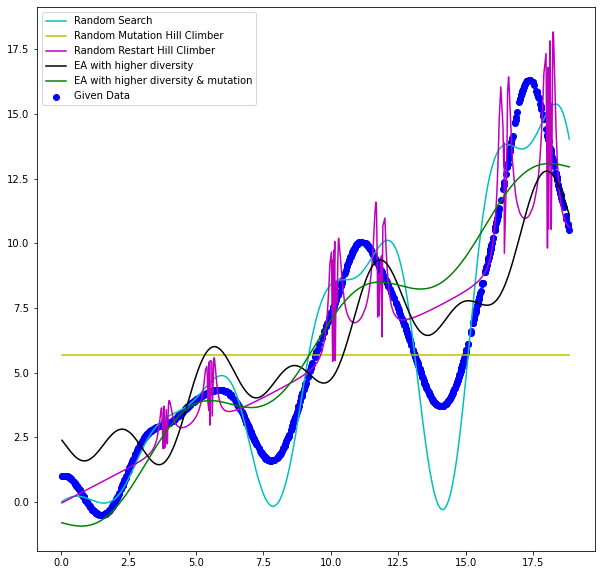

In [42]:
rs_graph = pd.read_csv(f"{rs}_graph.csv")
rmhc_graph = pd.read_csv(f"{rmhc}_graph.csv")
rrhc_graph = pd.read_csv(f"{rrhc}_graph.csv")
ea_div_graph = pd.read_csv(f"{ea_div}_graph.csv")
ea_div_m_graph = pd.read_csv(f"{ea_div_m}_graph.csv")

data = "data.txt"
df = pd.read_csv(f'{data}', header = None, sep=", ", names=["x", 'y'], engine='python')
x_s = df["x"].to_numpy()
y_s = df["y"].to_numpy()

plt.figure(figsize=(10,10))
plt.scatter(x_s, y_s,color='blue', label="Given Data");
plt.plot(x_s, rs_graph,color='c', label="Random Search");
plt.plot(x_s, rmhc_graph,color='y', label="Random Mutation Hill Climber");
plt.plot(x_s, rrhc_graph,color='m', label="Random Restart Hill Climber");
plt.plot(x_s, ea_div_graph,color='k', label="EA with higher diversity");
plt.plot(x_s, ea_div_m_graph,color='g', label="EA with higher diversity & mutation");
plt.legend()